<center> 
  <h1 style="color:white; background-color:Black ; font-size:75px;">Uber Data Analysis</h1> 
</center>

In [134]:
#Importing the required libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os



<center> 
  <h1 style="color:black; ; font-size:50px;">Data Understanding</h1> 
</center>

In [135]:
#Loading the data frame
df = pd.read_csv('C:\\Users\\Rajas Chaudhari\\Downloads\\UberDataset.csv')

In [136]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [137]:
#Checking the data types and total null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<center> 
  <h1 style="color:black; ; font-size:50px;">Data Cleaning</h1> 
</center>

In [138]:
#As we can see there are 503 null values in PURPOSE 
# For the analysis we need to fill the null values of PURPOSE with UNKNOWN
df['PURPOSE']=df['PURPOSE'].fillna('UNKNOWN')

#Also we can see that there is 1 null value in features End_Date , CATEGORY , START , STOP.
#We can handle the null value by dropping the record as it is only a single record.

df.dropna(inplace=True)
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

<center> 
  <h1 style="color:black; ; font-size:50px;">Data Preprocessing</h1> 
</center>

In [166]:
#Converting START_DATE and END_DATE into datetime format
df['START_DATE']=pd.to_datetime(df['START_DATE'])
df['END_DATE']=pd.to_datetime(df['END_DATE'])

#Catergorizing the time of the day into labels Morning , Afternoon , Evening , Night
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY']=df['START_DATE'].apply(lambda i:i.hour)
df['TIME_OF_DAY']=pd.cut(x=df['TIME_OF_DAY'],bins=[0,6,11,17,21,24],\
                                labels=['Night','Morning','Afternoon','Evevning','Night'] , ordered = False)

#Creating a Feature to represent the month of ride
df['MONTH_OF_RIDE']=df['START_DATE'].apply(lambda i :i.month)
month_label = {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',
               7.0:'Jul',8.0:'Aug',9.0:'Sept',10.0:'Oct',11.0:'Nov',12.0:'Dec'}
df['MONTH_OF_RIDE']=df['MONTH_OF_RIDE'].map(month_label)


#Creating a feature to represent the day of week
df['DAY_OF_RIDE']=df['START_DATE'].apply(lambda i:i.weekday())
day_label={0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['DAY_OF_RIDE']=df['DAY_OF_RIDE'].map(day_label)


#Duration of the ride in minutes
df['DURATION_OF_RIDE']=(df['END_DATE']-df['START_DATE']).astype('timedelta64[m]')

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_OF_DAY,MONTH_OF_RIDE,DAY_OF_RIDE,DURATION_OF_RIDE,DATE,TIME_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Evevning,Jan,Fri,6.0,2016-01-01,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,Night,Jan,Sat,12.0,2016-01-02,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Evevning,Jan,Sat,13.0,2016-01-02,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Afternoon,Jan,Tue,14.0,2016-01-05,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon,Jan,Wed,67.0,2016-01-06,14


<center> 
  <h1 style="color:black; ; font-size:50px;">Data Exploration</h1> 
</center>

In [167]:
#Summarizing statistics of the dataframe
df.describe()

,MILES,DURATION_OF_RIDE,TIME_DAY
count,1155.000000,1155.000000,1155.000000
mean,10.566840,23.243290,14.696104
std,21.579106,27.318277,4.575226
min,0.500000,0.000000,0.000000
25%,2.900000,10.000000,12.000000
50%,6.000000,16.000000,15.000000
75%,10.400000,27.500000,18.000000
max,310.300000,336.000000,23.000000


In [168]:
print('Minimum Timestamp is START_TIME is :- {}'.format(df['START_DATE'].min()))
print('Maximum Timestamp is START_TIME is :- {}'.format(df['START_DATE'].max()))


Minimum Timestamp is START_TIME is :- 2016-01-01 21:11:00
Maximum Timestamp is START_TIME is :- 2016-12-31 22:08:00


In [169]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


<center> 
  <h1 style="color:black; ; font-size:50px;">Data Visualization</h1> 
</center>

In [170]:
# Convert 'CATEGORY' column to categorical data type
df['CATEGORY'] = df['CATEGORY'].astype('category')



# Count Plot Showing the distribution betweeen the categories.

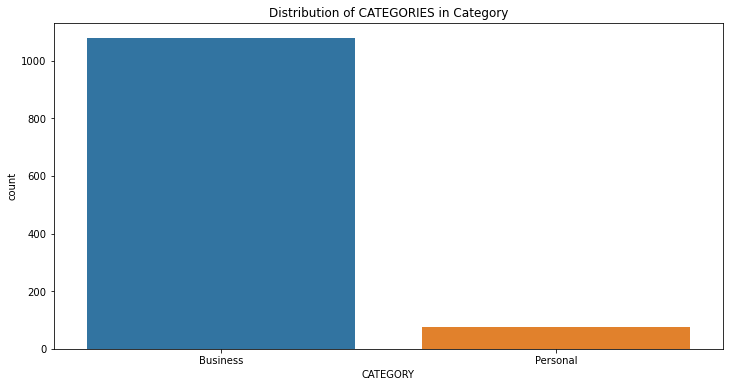

In [171]:
# Distribution of Categories in CATEGORY
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='CATEGORY')
plt.title('Distribution of CATEGORIES in Category')
plt.show()

## The Categories Countplot shows that people took the uber ride for Business the most.

# Count Plot Showing the distribution of Purpose.

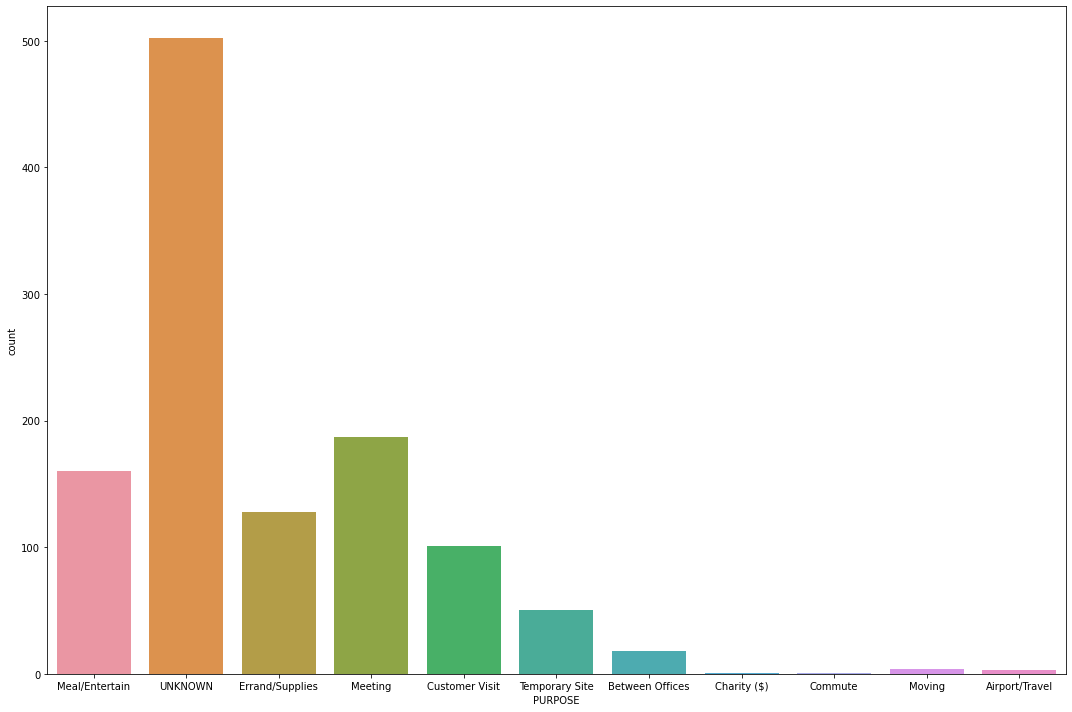

In [172]:
#Distribution of Categories in Purpose
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='PURPOSE')
plt.tight_layout()
plt.show()

## The Purpose Countplot shows that most of the riders have not listed their reason for the ride

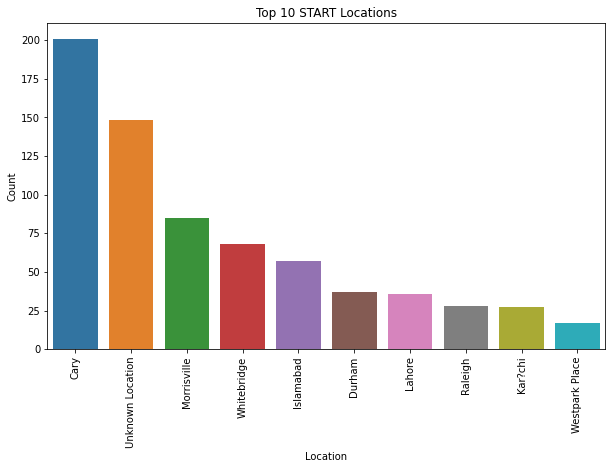

In [173]:
# Prepare data for the top 10 locations for START
temp = df['START'].value_counts().nlargest(10).reset_index()
temp.columns = ['Location', 'Count']  # Rename the columns for clarity

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(data=temp, x='Location', y='Count')
plt.title('Top 10 START Locations')
plt.xticks(rotation=90) 
plt.show()


## The Bar Plot shows the Top 10 Start Location for the ride. As the analysis show that most of the ride start from Cary


# Bar Plot for Top 10 Start and Stop Locations , Using subplots

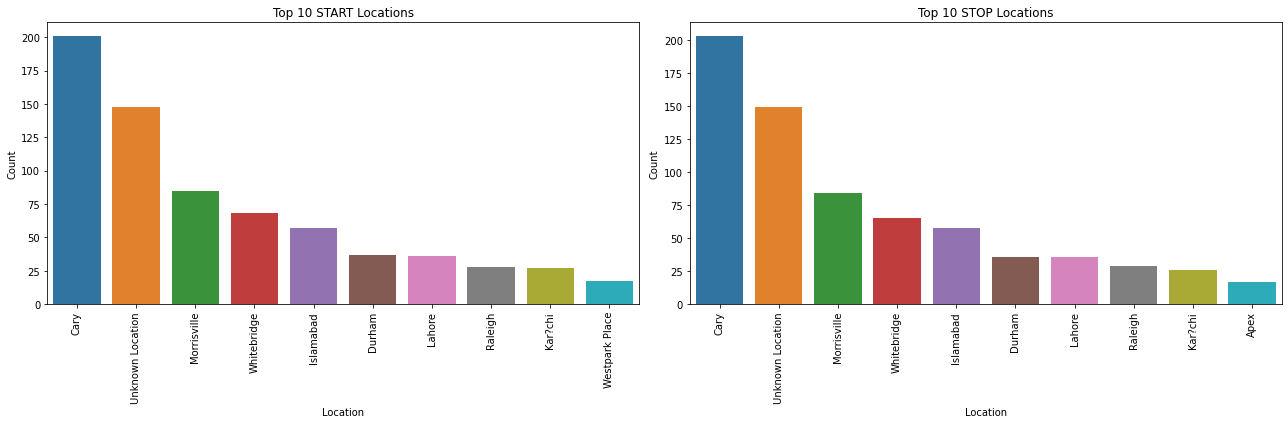

In [174]:
# Prepare data for the top 10 START locations
start_temp = df['START'].value_counts().nlargest(10).reset_index()
start_temp.columns = ['Location', 'Count']

# Prepare data for the top 10 STOP locations
stop_temp = df['STOP'].value_counts().nlargest(10).reset_index()
stop_temp.columns = ['Location', 'Count']

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figure size for both plots

# Plot for Top 10 START Locations
sns.barplot(data=start_temp, x='Location', y='Count', ax=axes[0])
axes[0].set_title('Top 10 START Locations')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot for Top 10 STOP Locations
sns.barplot(data=stop_temp, x='Location', y='Count', ax=axes[1])
axes[1].set_title('Top 10 STOP Locations')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()


## Successfully Created the Barplot using subplots.

# Line Plot and Scatter plot 


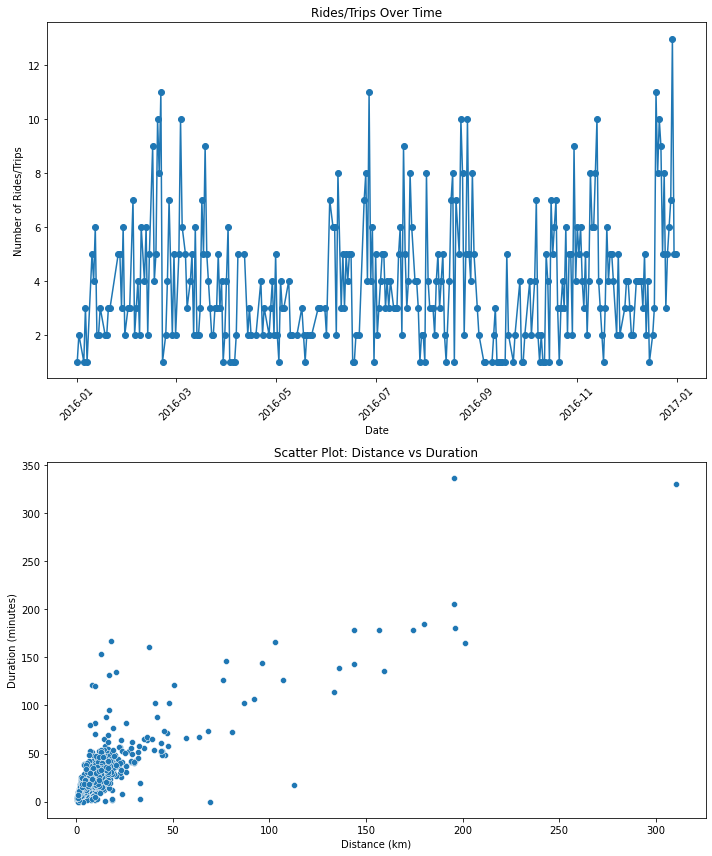

In [175]:

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

## 1. Line Chart - showing rides or sales over time (assuming 'START_DATE' and 'Sales' or 'Trips')
# Group by date and count occurrences per day
df['DATE'] = df['START_DATE'].dt.date  # Extract date
daily_counts = df.groupby('DATE').size().reset_index(name='COUNT')  # Count entries per day

# Plot a line chart
axes[0].plot(daily_counts['DATE'], daily_counts['COUNT'], marker='o')
axes[0].set_title('Rides/Trips Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Rides/Trips')
axes[0].tick_params(axis='x', rotation=45)

## 2. Scatter Chart - showing Distance vs Duration (replace with your numerical columns)
sns.scatterplot(data=df, x='MILES', y='DURATION_OF_RIDE', ax=axes[1])
axes[1].set_title('Scatter Plot: Distance vs Duration')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Duration (minutes)')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


## Line Plot and Scatter Plot using subplot feature 

# Count Plot of the Rides with respect to Time of Day

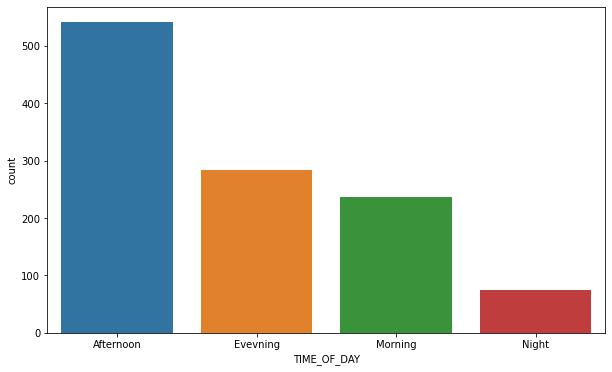

In [176]:
# Convert 'TIME_OF_DAY' column to categorical data type
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.show()


## The above count plots depicts that Afternoon is the time of day where most rides happen

# Plotting Bar Plot using Groupby feature , with Count Plot

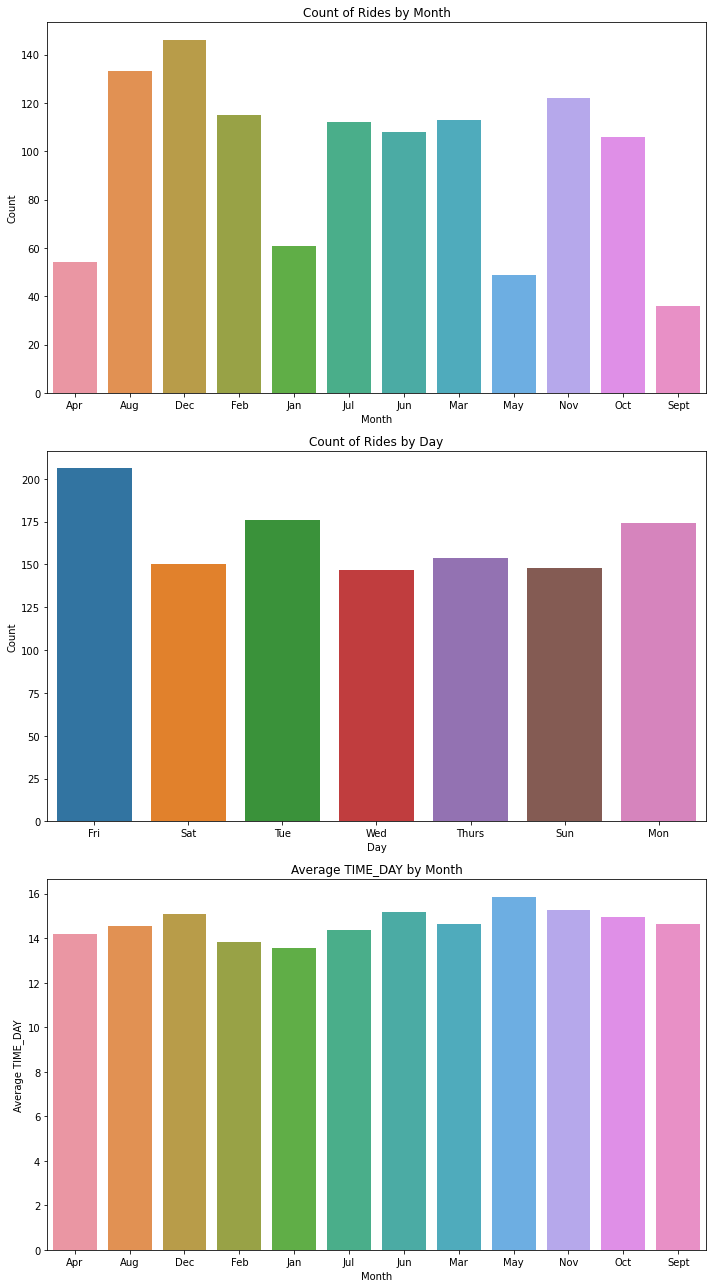

In [185]:

# Convert 'MONTH_OF_THE_RIDE' column to categorical data type
df['MONTH_OF_RIDE'] = df['MONTH_OF_RIDE'].astype('category')

# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Countplot for MONTH_OF_THE_RIDE
sns.countplot(data=df, x='MONTH_OF_RIDE', ax=axes[0])
axes[0].set_title('Count of Rides by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Countplot for DAY_OF_THE_RIDE
sns.countplot(data=df, x='DAY_OF_RIDE', ax=axes[1])
axes[1].set_title('Count of Rides by Day')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

# Bar plot for average TIME_DAY by MONTH_OF_THE_RIDE
temp = df.groupby('MONTH_OF_RIDE')['TIME_DAY'].mean().reset_index()
sns.barplot(x='MONTH_OF_RIDE', y='TIME_DAY', data=temp, ax=axes[2])
axes[2].set_title('Average TIME_DAY by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average TIME_DAY')

# Adjust layout
plt.tight_layout()

# Show the combined plots
plt.show()


<center> 
  <h2 style="color:white;background-color:black ; font-size:75px;">Thank You</h2> 
</center>